In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int,\
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float,\
              'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int,\
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

data = pd.read_csv("kc_house_data.csv", dtype = dtype_dict)
data = data.drop('id',1)
data.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [3]:
#Split data into dependent variable(target) and independ variables(features)

y = data.price
X = data.drop('price',1)
y.describe()
#X.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [4]:
#Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape,'\n',X_test.shape)

print(X_train.describe())


(17290, 19) 
 (4323, 19)
           bedrooms     bathrooms   sqft_living      sqft_lot    waterfront  \
count  17290.000000  17290.000000  17290.000000  1.729000e+04  17290.000000   
mean       3.370040      2.113765   2078.321747  1.511571e+04      0.007056   
std        0.934567      0.769895    917.077036  4.168949e+04      0.083706   
min        0.000000      0.000000    290.000000  5.200000e+02      0.000000   
25%        3.000000      1.750000   1430.000000  5.040000e+03      0.000000   
50%        3.000000      2.250000   1910.000000  7.598000e+03      0.000000   
75%        4.000000      2.500000   2550.000000  1.064500e+04      0.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      1.000000   

               view     condition         grade    sqft_above  sqft_basement  \
count  17290.000000  17290.000000  17290.000000  17290.000000   17290.000000   
mean       0.233256      3.411510      7.653788   1787.583516     290.738230   
std        0.766070    

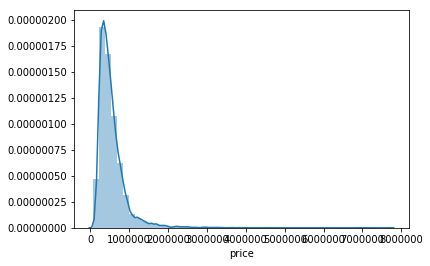

In [5]:
sb.distplot(y)

In [6]:
print("Skewness:", y.skew())
print("Kurtosis:", y.kurt())

Skewness: 4.024069144684712
Kurtosis: 34.58554043194243


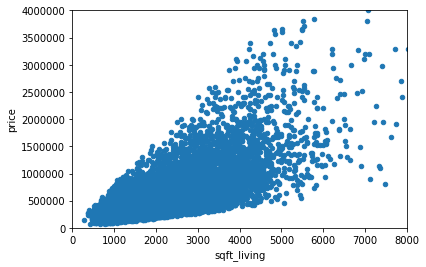

In [7]:
df = pd.concat([y, X['sqft_living']],axis=1)
df.plot.scatter(x='sqft_living', y='price', ylim=(0,4000000), xlim=(0,8000))

In [8]:
#Simple Linear regression using closed form solution

def simple_linear_regression(X, y):
    X_mean = X.mean()
    y_mean = y.mean()
    
    Xy = X*y
    Xy_mean = Xy.mean()
    
    X_square = X*X
    XX_mean = X_square.mean()
    
    numerator = Xy_mean - (X_mean)*(y_mean)
    denominator = XX_mean - (X_mean)*(y_mean)
    
    slope = numerator/denominator
    intercept = y_mean - slope*X_mean
    
    
    return intercept, slope
    

In [9]:
theta_0, theta_1 = simple_linear_regression(X_train['sqft_living'], y_train)
print("intercept:", theta_0)
print("slope:", theta_1)

intercept: 540391.9792817088
slope: -0.20938115611936026


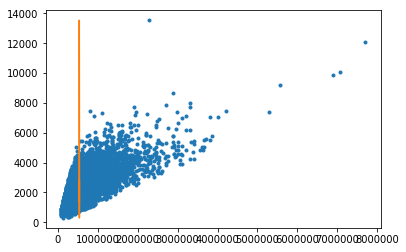

In [10]:
plt.plot(y_train,X_train['sqft_living'],'.',list(theta_0+theta_1*X_train['sqft_living'][:]),X_train['sqft_living'],'-')

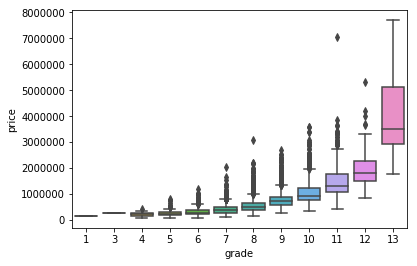

In [11]:
#categorical data
df = pd.concat([y_train, X_train['grade']],axis=1)
sb.boxplot(x='grade', y='price', data = df)

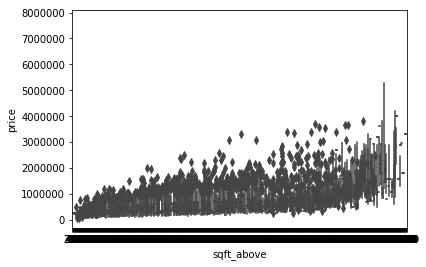

In [12]:
df = pd.concat([y_train, X_train['sqft_above']],axis=1)
sb.boxplot(x='sqft_above', y='price', data = df)

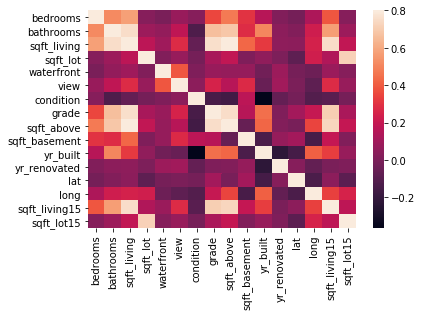

In [13]:
# correlation matrix (heat map)
correl_mat = X_train.corr()
sb.heatmap(correl_mat,vmax=.8)